In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline


In [12]:
data = datasets.fetch_openml(
                    'mnist_784',
                    version=1,
                    return_X_y = True
)

pixel_values, targets = data
pixel_values = pixel_values.to_numpy()
targets = targets.astype(int)

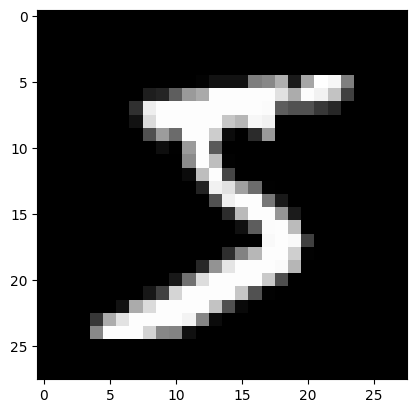

In [16]:
single_image = pixel_values[0, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42) #converts into lower dimensions, only 2 dimensions
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [18]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [19]:
tsne_df.head(10)

,x,y,targets
0,18.118757,-7.029310,5.0
1,55.944077,-4.072447,0.0
2,1.069047,-51.358601,4.0
3,-41.786022,17.729443,1.0
4,-8.884236,-29.844904,9.0
5,-26.945049,5.125371,2.0
6,-2.996459,23.898924,1.0
7,9.947347,14.205321,3.0
8,-8.308343,22.185280,1.0
9,-18.696135,-15.468534,4.0


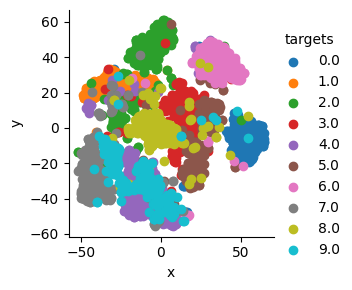

In [22]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()